In [15]:
#PUNTO 1

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

wine = load_wine()

In [30]:
X = wine.data
X_norm = StandardScaler().fit_transform(wine.data)

In [31]:
#Cargo la siguiente data, en xTrain,le cargo el 80% de los datos de X(wine.data) a xTrain, y el 20% restante, a xTest
#Tambien, porcentualmente de la misma manera, asigno sus etiquetas o targets a yTrain e yTest
xTrain,xTest,yTrain,yTest = train_test_split(X,wine.target,test_size=0.2,random_state=5)
#Luego, ejecuto el mismo procedimiento con la data normalizada
xTrainNorm,xTestNorm,yTrainNorm,yTestNorm = train_test_split(X_norm, wine.target,test_size=0.2,random_state=5)

#Aclaro, el random_state se encarga de hacer un "shuffle" de los datos, que se mezclan segun su valor, por lo que, para que
#tanto la data normalizada como la normal sean iguales, su valor en random_state debe de ser la mismag


In [32]:
#PUNTO 2

In [57]:
#Primero, importamos las librerias que se nos ordena
from sklearn import neighbors

#Luego, creamos la variable knn, que representara este tipo de predicción
knn = neighbors.KNeighborsClassifier(n_neighbors=5)



In [58]:
#Luego, comenzamos con la predicción del primer dataset para luego graficarla.

#Delimitamos los bordes en los cuales podremos hacer el cuadro.
x_min, x_max = xTrain[:, 0].min() -1, xTrain[:,0].max()+1
y_min, y_max = xTrain[:, 1].min() -1, xTrain[:,1].max()+1
xx, yy=np.meshgrid(np.arange(x_min,x_max,0.1), np.arange(y_min, y_max, 0.1))


In [81]:
#Creamos la primera predicción
pred = knn.predict(np.c_[xx.ravel(), yy.ravel()])

ValueError: X has 2 features, but KNeighborsClassifier is expecting 59 features as input.

In [ ]:
#PUNTO 3

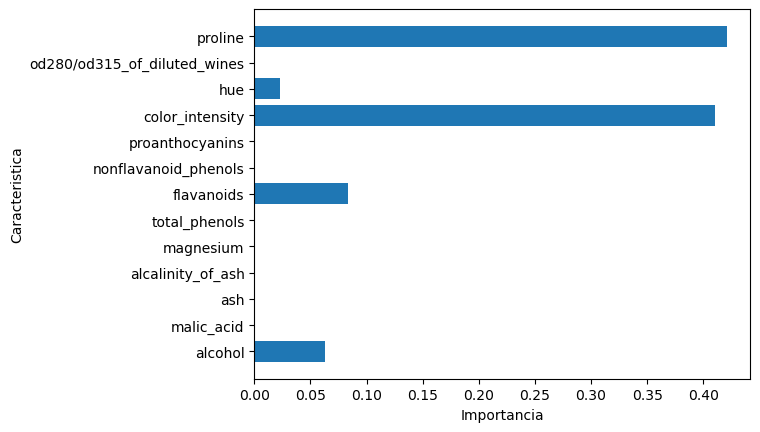

In [93]:
#Datos sin normalizar
#Importamos las librerias necesarias para utilizar arbol de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
#import graphviz

#Creamos la variable, definiendo su maxima depth, y fiteamos los datos
arbol=DecisionTreeClassifier(max_depth=3)
arbol.fit(xTrain, yTrain)
#Este score no se ve, pero esta para mostrar la puntuación.
arbol.score(xTest, yTest)

#Con esto, puedo crear un archivo que muestre un grafico bien hecho del arbol de decisión, pero no me anda(?)
export_graphviz(arbol,out_file='arbol1.dot', class_names=wine.target_names, feature_names=wine.feature_names[:13],impurity=False,filled=True)

with open('arbol1.dot') as f:
    dot_graph = f.read()
  #  graphviz.Source(dot_graph)

#Luego, lo mostramos tambien como un cuadro
caracteristica=wine.data.shape[1]
plt.barh(range(caracteristica),arbol.feature_importances_)
plt.yticks(np.arange(caracteristica),wine.feature_names)
plt.xlabel('Importancia')
plt.ylabel('Caracteristica')
plt.show()